# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#Load libraries
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import t

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Check info of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


Yes, the distribution of body temperatures appears graphically normal.


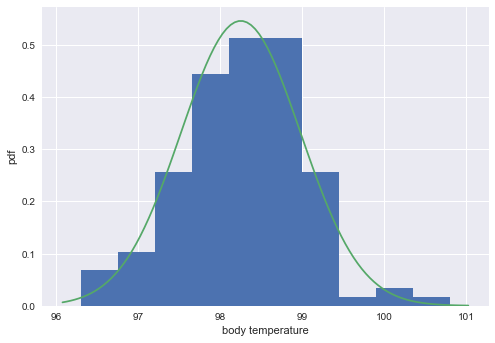

In [4]:
# Is the distribution of body temperatures normal?

# Plot histogram of body temperatures
body_temp = np.array(df['temperature'])
plt.hist(body_temp, normed=True)
plt.xlabel('body temperature')
plt.ylabel('pdf')

# Plot pdf of body temperatures
mean, std = np.mean(body_temp), np.std(body_temp)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf)

print('Yes, the distribution of body temperatures appears graphically normal.')
plt.show()

In [5]:
# Is the sample size large? Are the observations independent?
print('yes, the sample size is sufficiently large (n >= 30) at 130 observations.')
print('yes, the observations are independent as each observation is neither related to or affect another.')

yes, the sample size is sufficiently large (n >= 30) at 130 observations.
yes, the observations are independent as each observation is neither related to or affect another.


𝐻₀: μ = 98.6
𝐻ₐ: μ ≠ 98.6
Based on the bootstrap hypothesis test, it appears that we can reject the null hypothesis since the bootstrap temperatures do not equal 98.6.


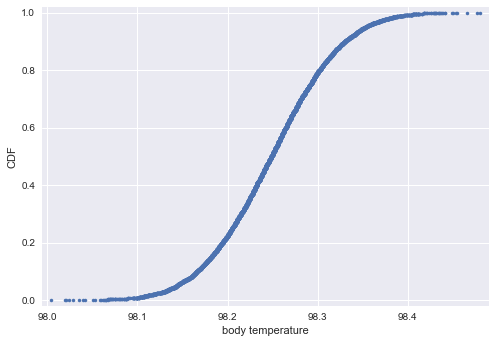

In [6]:
# Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test
print('𝐻₀: μ = 98.6')
print('𝐻ₐ: μ ≠ 98.6')
print('Based on the bootstrap hypothesis test, it appears that we can reject the null hypothesis since the bootstrap temperatures do not equal 98.6.')

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

bs_temp = draw_bs_reps(body_temp, np.mean, 10000)

x_theor = np.sort(bs_temp)
y_theor = np.arange(1, len(x_theor)+1) / len(x_theor)

plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.xlabel('body temperature')
plt.ylabel('CDF')
plt.margins(0.02)

plt.show()

In [7]:
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
print('A one-sample test will be used to test where a population mean differs from a proposed population mean and not comparing against to another group')

A one-sample test will be used to test where a population mean differs from a proposed population mean and not comparing against to another group


In [8]:
# In this situation, is it appropriate to use the t or z statistic?
print('It is appropriate to use a t statistic because we are testing a population mean without a known population variance. \n')

# Calculate t statistic and accompanying p value
len_temp = len(body_temp)
t_stat = (mean - 98.6) / (std / np.sqrt(len_temp))
print('The t-statistic is '+ str(t_stat))

t_pval = stats.t.sf(np.abs(t_stat), len_temp-1)*2
print('The p-value is '+ str(t_pval))

It is appropriate to use a t statistic because we are testing a population mean without a known population variance. 

The t-statistic is -5.47592520208
The p-value is 2.18874646241e-07


In [9]:
# Now try using the other test. How is the result be different? Why?
z_score = (mean - 98.6) / (std / np.sqrt(len_temp))
print('The z-score is '+ str(z_score))

z_pval = stats.norm.sf(np.abs(z_score))*2
print('The p-value is '+ str(z_pval))

print('\nThe p-values are different because the z test is based a normal distribution with a known population variance, whereas the t test is based on a sample distribution with a sample population variance.')

The z-score is -5.47592520208
The p-value is 4.35231516587e-08

The p-values are different because the z test is based a normal distribution with a known population variance, whereas the t test is based on a sample distribution with a sample population variance.


In [10]:
# Draw a small sample of size 10 from the data and repeat both frequentist tests.
np.random.seed(42)
inds = np.arange(len(body_temp))
random_inds = np.random.choice(inds, size=10)
sm_sample = body_temp[random_inds]
sm_mean = np.mean(sm_sample)
sm_std = np.std(sm_sample)

# Calculate t statistic and accompanying p value
sm_tstat = (sm_mean - 98.6) / (sm_std / np.sqrt(10))
print('The t-statistic is '+ str(sm_tstat))

sm_tpval = stats.t.sf(np.abs(sm_tstat), len(sm_sample)-1)*2
print('The p-value is '+ str(sm_tpval))

print('\n')

# Calculate z statistic and accompanying p value
sm_zscore = (sm_mean - 98.6) / (std / np.sqrt(10))
print('The z-score is '+ str(sm_zscore))

sm_zpval = stats.norm.sf(np.abs(sm_zscore))*2
print('The p-value is '+ str(sm_zpval))

The t-statistic is -3.26078041701
The p-value is 0.00982646825145


The z-score is -2.38137083403
The p-value is 0.0172483385352


In [11]:
# What do you notice? What does this tell you about the difference in application of the t and z statistic?
print('With a sample size of 10, we now notice the difference in t and z statistic values.  This is a case we the t statistic is better suited for a sample distribution.')

With a sample size of 10, we now notice the difference in t and z statistic values.  This is a case we the t statistic is better suited for a sample distribution.


In [12]:
# At what temperature should we consider someone's temperature to be "abnormal"?

# Calculate bootstrap 95% confidence interval
bs_confid_int = np.percentile(bs_temp, [2.5, 97.5])
bs_confid_int

# Calculate frequentist 95% confidence interval
t_bounds = t.interval(0.95, len_temp-1)
freq_confid_int = [mean + ((crit_val * std) / np.sqrt(len_temp)) for crit_val in t_bounds]

margin_of_err = freq_confid_int - mean

print('Bootstrap 95% CI: We should consider someones temperature abnormal when outside of '  + str(bs_confid_int))
print('Frequentist 95% CI: We should consider someones temperature abnormal when outside of ' + str(freq_confid_int))

Bootstrap 95% CI: We should consider someones temperature abnormal when outside of [ 98.12538462  98.37309615]
Frequentist 95% CI: We should consider someones temperature abnormal when outside of [98.122493188216382, 98.375968350245117]


In [13]:
# Is there a significant difference between males and females in normal temperature?
print('𝐻₀: μ1 - μ2 = 0')
print('𝐻ₐ: μ1 - μ2 ≠ 0')

male_temp = np.array(df.temperature[df.gender == 'M'])
female_temp = np.array(df.temperature[df.gender == 'F'])

mean_difference = np.mean(male_temp) - np.mean(female_temp)
std_difference = np.sqrt((np.var(male_temp)/len(male_temp))+(np.var(female_temp)/len(female_temp)))

diff_confid_int = [mean_difference - 1.96*std_difference, mean_difference + 1.96*std_difference]
print('Since 0 does is not covered within our 95% confidence interval of ' + str(diff_confid_int) + ', we can reject the null hypothesis and confidently determine that there is a significant difference between the two groups.')

𝐻₀: μ1 - μ2 = 0
𝐻ₐ: μ1 - μ2 ≠ 0
Since 0 does is not covered within our 95% confidence interval of [-0.53536107224690144, -0.043100466214637839], we can reject the null hypothesis and confidently determine that there is a significant difference between the two groups.
